# Video games data analysis

### Описание проекта

**Цель проекта** - выявить определяющие успешность игры закономерности для интернет-магазина «Стримчик» для выявления потенциально популярного продукта и планирования рекламной кампании.

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) до 2016 года. 

Основная **задача проекта** - составить портрет пользователя каждого региона.

Для решения задачи необходимо выполнить **следующие шаги**:
- открыть файл с данными и изучить общую информацию;
- выполнить предобработку данных;
- провести исследовательский анализ данных;
- составить портрет пользователя каждого региона;
- проверить гипотезы;
- написать общий вывод.

**1. Загрузка данных и изучение общей информации**

**2. Предобработка данных**
- Заменить названия столбцов (привести к нижнему регистру);
- Преобразовать данные в нужные типы;
- Обработать пропуски при необходимости;
- Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

**3. Исследовательский анализ данных**
- Посмотреть, сколько игр выпускалось в разные годы;
- Посмотреть, как менялись продажи по платформам;
- Взять данные за соответствующий актуальный период. Эти данные помогут построить прогноз на 2017 год;
- Определить, какие платформы лидируют по продажам, растут или падают. Выбрать несколько потенциально прибыльных платформ;
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам;
- Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами;
- Соотнести выводы с продажами игр на других платформах;
- Посмотреть на общее распределение игр по жанрам.

**4. Составить портрет пользователя каждого региона**
- Определить для пользователя каждого региона (NA, EU, JP):
  - Самые популярные платформы (топ-5)
  - Самые популярные жанры (топ-5)
  - Влияет ли рейтинг ESRB на продажи в отдельном регионе?
  
**5. Проверка гипотез**
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

*В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».*

## Загрузка данных и изучение общей информации

In [1]:
# импорт библиотек
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
# сохранение датасета в переменную 
data = pd.read_csv('/datasets/games.csv') 

In [3]:
# вывод первых 10 строк
data.head(10) 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# вывод информации по датасету
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# посмотрим размер датастета
data.shape

(16715, 11)

In [6]:
# вывод стат. информации
data.describe() 

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [7]:
# подсчет пропусков
data.isna().sum() 

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [8]:
# подсчет дубликатов
data.duplicated().sum() 

0

<div class="alert alert-info">

**📝 Комментарий Маши**
    
Изучив данные, можно выделить основные аспекты:
- в датафрейме 11 столбцов и 16715 строк
- столбец с годом выпуска игры нуждается в конвертации из вещественного типа в целочисленный; столбцы с оценкой пользователей - с текстового в вещественный.
- датасет содержит пропуски в нескольких столбцах (ими займемся в предобработке);
- дубликатов нет.
    
</div>

## Предобработка данных

- Заменить названия столбцов (привести к нижнему регистру);

In [9]:
# перевод названий столбцов в нижний регистр
data.columns = data.columns.str.lower() 

- Обработать пропуски при необходимости;

In [10]:
# заполнение пропусков 
data['critic_score'] = data['critic_score'].fillna('unknown') 
data['user_score'] = data['user_score'].fillna('unknown')
data['rating'] = data['rating'].fillna('no_rating')

- Преобразовать данные в нужные типы;

In [11]:
# замена типа данных на другой 
data['year_of_release'] = np.floor(pd.to_numeric(data['year_of_release'], errors='coerce')).astype('Int64') 
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce').astype('float64')
data['critic_score'] = pd.to_numeric(data['critic_score'], errors='coerce').astype('float64')

- Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

In [12]:
# создание столбца с суммарными продажами
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis=1) 

<div class="alert alert-info">

**📝 Комментарий Маши**    
  
На данном этапе заполнила пропуски в столбцах "оценка пользователей" и "оценка критиков" на текстовые значения. В дальнейшем при условии определения выборки изменю на 0. Также заменила пропуски в столбце "рейтинг" на "нет рейтинга". 
    
Остальные столбцы оставила, т.к. они в целом не нуждаются в заполнении. Аббревиатуру 'tbd' в столбце с оценкой пользователей заменять не стала, в этом нет необходимости.
    
Произвела замену типа данных в стобцах "год выпуска" - с вещественного на целочисленный (для более привычного вида), "оценка пользователей", "оценка критиков" - с тектового в вещественное число (для корректности вычислений по этим данным).
    
</div>

## Исследовательский анализ данных

- Посмотреть, сколько игр выпускалось в разные годы;

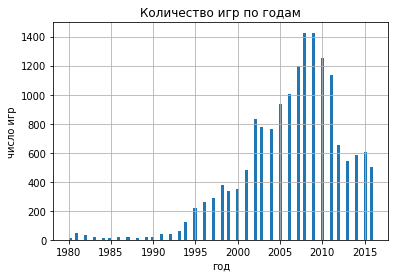

In [13]:
# построение гистограммы зависимости
data['year_of_release'].hist(bins=100) 
plt.title('Количество игр по годам') 
plt.xlabel("год")
plt.ylabel("число игр")
plt.show()

<div class="alert alert-info">

**📝 Комментарий Маши**   
  
Большее количество игр выпускалось наряду с развитием индустрии и компьютерной техники. С конца 1990-х резкими скачками увеличился выпуск игр. Пиковые года конец 2000-х - начало 2010-х. С 2012 г. индустрия испытывает резкий спад выпуска игр.

</div>

Посмотреть, как менялись продажи по платформам;

In [14]:
# создание сводной таблицы
top_platforms = data.pivot_table(index = 'platform', values = 'total_sales', aggfunc='sum') 

# сортировка по убыванию по столбцу с общими продажами
top_platforms = top_platforms.sort_values(by='total_sales', ascending = False).head(10)

# сбросить индексы
top_platforms = top_platforms.reset_index()

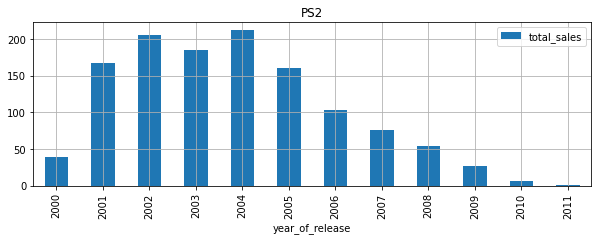

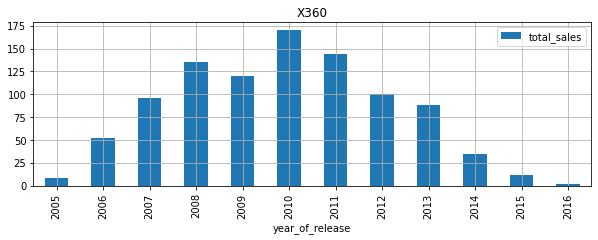

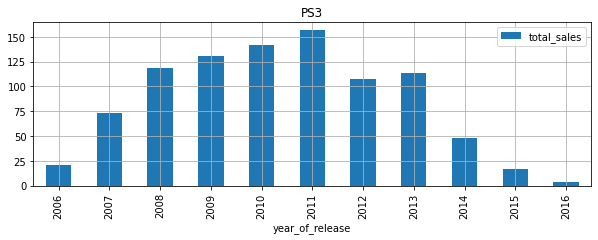

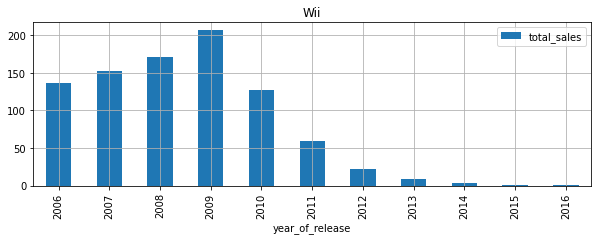

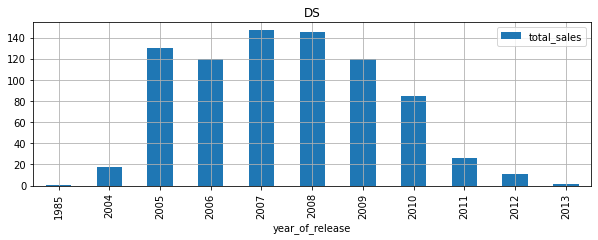

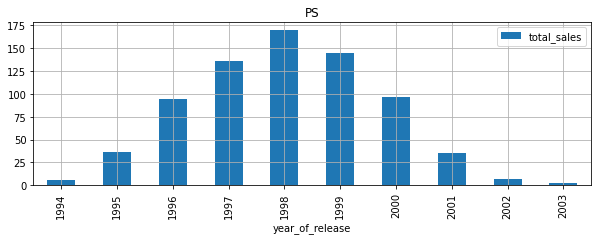

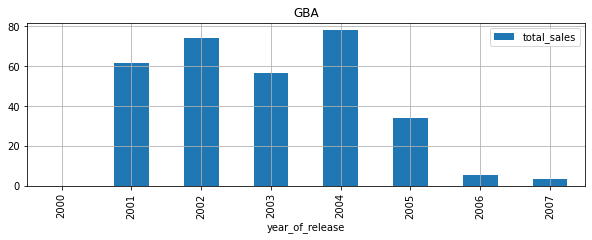

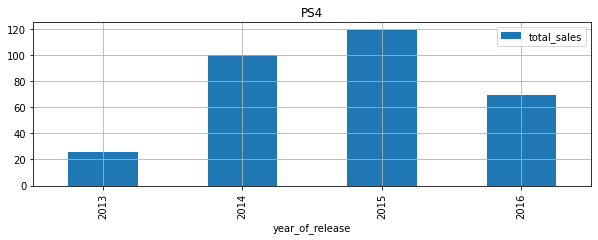

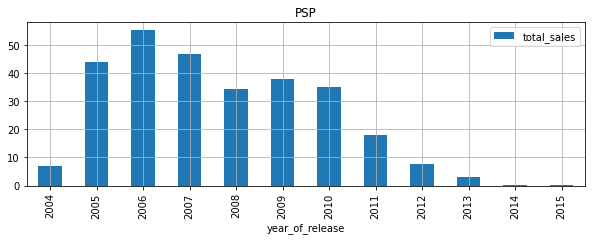

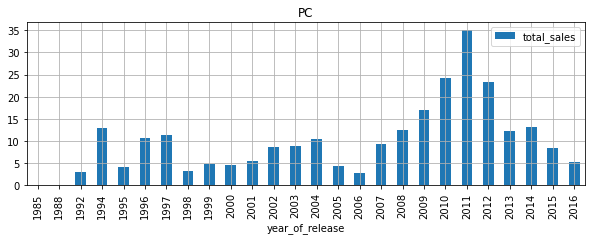

In [15]:
# построение гистограмм зависимости
for i in top_platforms['platform']:
    data.query('platform ==@i').pivot_table(index='year_of_release', values='total_sales', \
                                            aggfunc='sum').plot(kind='bar', grid=True, figsize=(10, 3))
    plt.title(i) 

<div class="alert alert-info">

**📝 Комментарий Маши** 
   
Продажи по платформам начинались с момента популярности/актуальности самой платформы и сходили на нет по причине забвения ее же.
    
Средний срок жизни платформ - 10 лет, а вот пик популярности -длится примерно 5. 
</div>

- Взять данные за соответствующий актуальный период. Эти данные помогут построить прогноз на 2017 год;

In [16]:
# создание новой таблицы с актуальными данными
actual_data = data.query('year_of_release >= 2015') 

In [17]:
# вывод первых 5 строк новой таблицы
actual_data.head(5) 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no_rating,7.98
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,no_rating,7.39


<div class="alert alert-info">

**📝 Комментарий Маши** 
   
Наиболее актуальный период в результате исследования предыдущих вопросов, данные которых помогут построить прогноз на 2017 год - это с 2015-2016 гг. (более старые данные могут исказить прогнозные результаты). 
    
Для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватишь уже отжившие тренды. Но и слишком короткий период тоже брать не стоит.
    
</div>

- Определить, какие платформы лидируют по продажам, растут или падают. Выбрать несколько потенциально прибыльных платформ;

In [18]:
# создание сводной таблицы
top_platforms_actual = actual_data.pivot_table(index = 'platform', values = 'total_sales', aggfunc='sum') 

In [19]:
# сортировка значений по убыванию
top_platforms_actual = top_platforms_actual.sort_values(by='total_sales', ascending=False).head(3) 

In [20]:
# вывод таблицы
top_platforms_actual

,total_sales
platform,
PS4,188.15
XOne,86.29
3DS,42.92


<div class="alert alert-info">

**📝 Комментарий Маши** 
   
Актуальные лидирующие по продажам платформы - PS4, Xone, 3DS, WiiU, PS3.

</div>

- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам;

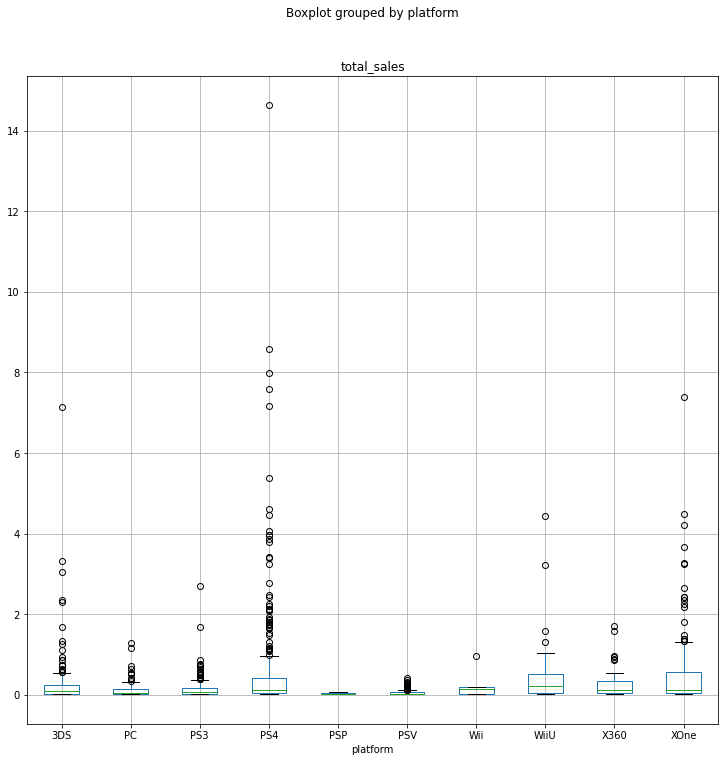

In [21]:
# построение графика "ящик с усами" 
actual_data.boxplot(by='platform', column='total_sales', figsize=(12, 12)) 
plt.show()

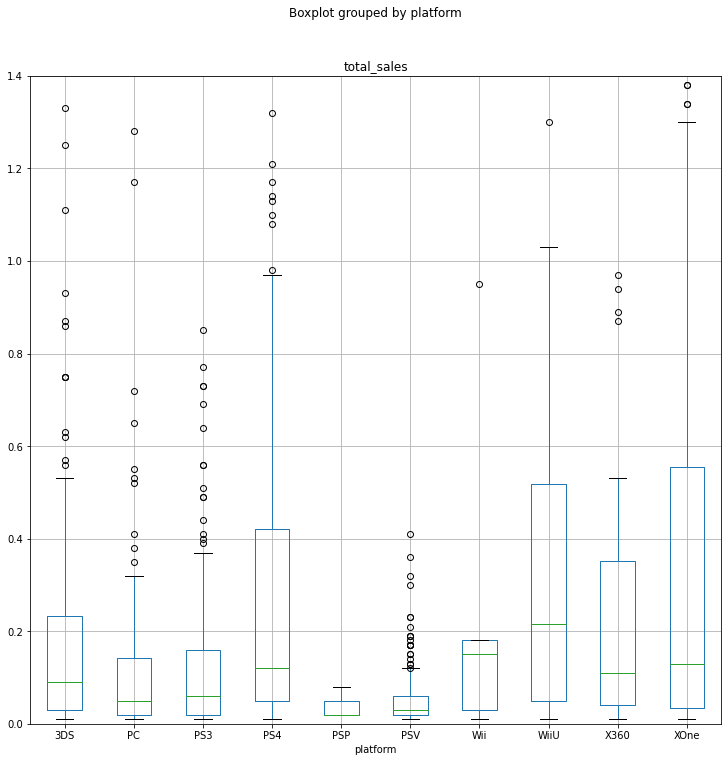

In [22]:
# построение графика "ящик с усами" 
actual_data.boxplot(by='platform', column='total_sales', figsize=(12, 12)) 
plt.ylim(0, 1.4)
plt.show()

In [23]:
# вывод стат. параметров
actual_data['total_sales'].describe()

count    1108.000000
mean        0.359134
std         0.943111
min         0.010000
25%         0.030000
50%         0.080000
75%         0.260000
max        14.630000
Name: total_sales, dtype: float64

<div class="alert alert-info">

**📝 Комментарий Маши** 
   
Выбросов не так много. Медиана в большинстве случаев намного ниже среднего арифметического. Удивительные результаты с платформой Wii - медиана больше среднего, расположена ближе к верхнему "усу". 
    
Стандартное отклонение, которое характеризует разброс величин и показывает, насколько значения в выборке отличаются от среднего арифметического - 0.94 по всей выборке, что в целом не велико и похоже на правду.

</div>

- Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами;

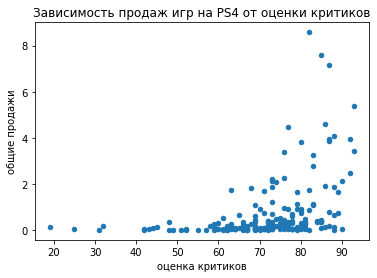

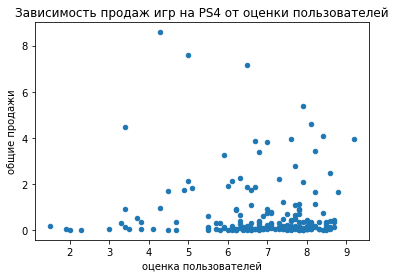

In [24]:
# построение диаграммы рассеяния
actual_data.loc[actual_data['platform'] == 'PS4'].plot(kind='scatter'
                                                       , x='critic_score'
                                                       , y='total_sales')
plt.title('Зависимость продаж игр на PS4 от оценки критиков')
plt.xlabel("оценка критиков")
plt.ylabel("общие продажи")
plt.show()

# построение диаграммы рассеяния
actual_data.loc[actual_data['platform'] == 'PS4'].plot(kind='scatter'
                                                       , x='user_score'
                                                       , y='total_sales')
plt.title('Зависимость продаж игр на PS4 от оценки пользователей')
plt.xlabel("оценка пользователей")
plt.ylabel("общие продажи")
plt.show() 

In [25]:
# вычисление коэффициента корреляции
actual_data.loc[actual_data['platform'] == 'PS4', 'critic_score'].\
corr(actual_data.loc[actual_data['platform'] == 'PS4', 'total_sales'])

0.3928485555130601

In [26]:
# вычисление коэффициента корреляции
actual_data.loc[actual_data['platform'] == 'PS4', 'user_score'].\
corr(actual_data.loc[actual_data['platform'] == 'PS4', 'total_sales'])

-0.05973845712638215

<div class="alert alert-info">

**📝 Комментарий Маши** 
   
По диаграмме рассеяния и коэффициенту корреляции можно сделать вывод, что:
- продажи игр на PS4 имеют слабую зависимость от оценки критиков с коэффициентом корреляции 0,32 (чем выше оценка, тем выше продажи);
- продажи игр на PS4 от оценки пользователей не зависят.

</div>

- Соотнести выводы с продажами игр на других платформах;

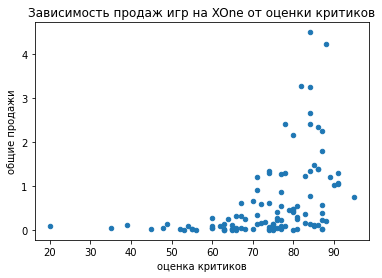

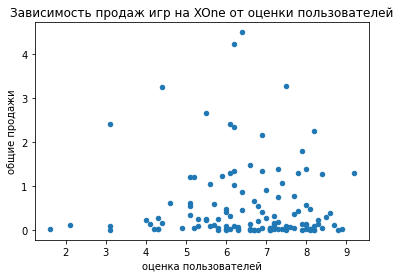

In [27]:
# построение диаграммы рассеяния
actual_data.loc[actual_data['platform'] == 'XOne'].plot(kind='scatter'
                                                       , x='critic_score'
                                                       , y='total_sales')
plt.title('Зависимость продаж игр на XOne от оценки критиков')
plt.xlabel("оценка критиков")
plt.ylabel("общие продажи")
plt.show()

# построение диаграммы рассеяния
actual_data.loc[actual_data['platform'] == 'XOne'].plot(kind='scatter'
                                                       , x='user_score'
                                                       , y='total_sales')
plt.title('Зависимость продаж игр на XOne от оценки пользователей')
plt.xlabel("оценка пользователей")
plt.ylabel("общие продажи")
plt.show() 

In [28]:
# вычисление коэффициента корреляции
actual_data.loc[actual_data['platform'] == 'XOne', 'critic_score'].\
corr(actual_data.loc[actual_data['platform'] == 'XOne', 'total_sales']) 

0.43088874582136805

In [29]:
# вычисление коэффициента корреляции
actual_data.loc[actual_data['platform'] == 'XOne', 'user_score'].\
corr(actual_data.loc[actual_data['platform'] == 'XOne', 'total_sales'])

-0.04146733387366271

<div class="alert alert-info">

**📝 Комментарий Маши** 
   
У платформы XOne прослеживается схожая зависимость продаж от отзывов критиков, как у PS4. 

</div>

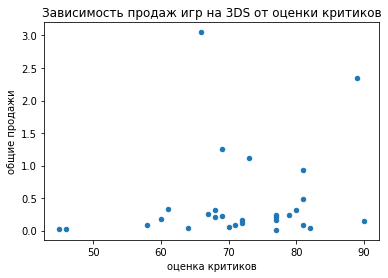

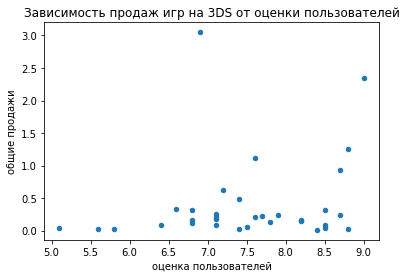

In [30]:
# построение диаграммы рассеяния
actual_data.loc[actual_data['platform'] == '3DS'].plot(kind='scatter'
                                                       , x='critic_score'
                                                       , y='total_sales')
plt.title('Зависимость продаж игр на 3DS от оценки критиков')
plt.xlabel("оценка критиков")
plt.ylabel("общие продажи")
plt.show()

# построение диаграммы рассеяния
actual_data.loc[actual_data['platform'] == '3DS'].plot(kind='scatter'
                                                       , x='user_score'
                                                       , y='total_sales')
plt.title('Зависимость продаж игр на 3DS от оценки пользователей')
plt.xlabel("оценка пользователей")
plt.ylabel("общие продажи")
plt.show()

In [31]:
# вычисление коэффициента корреляции
actual_data.loc[actual_data['platform'] == '3DS', 'critic_score'].\
corr(actual_data.loc[actual_data['platform'] == '3DS', 'total_sales']) 

0.17757455046092874

In [32]:
# вычисление коэффициента корреляции
actual_data.loc[actual_data['platform'] == '3DS', 'user_score'].\
corr(actual_data.loc[actual_data['platform'] == '3DS', 'total_sales'])

0.19879627008102982

<div class="alert alert-info">

**📝 Комментарий Маши**
    
Продажи платформы 3DS абсолютно не зависят ни от отзывов пользователей, ни от критиков. 
</div>

- Посмотреть на общее распределение игр по жанрам.

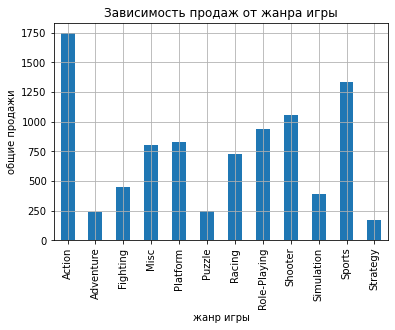

In [33]:
# построение столбчатой диаграммы зависимости
data.groupby('genre')['total_sales'].sum().plot(kind='bar', grid=True)
plt.title('Зависимость продаж от жанра игры')
plt.xlabel("жанр игры")
plt.ylabel("общие продажи")
plt.show() 

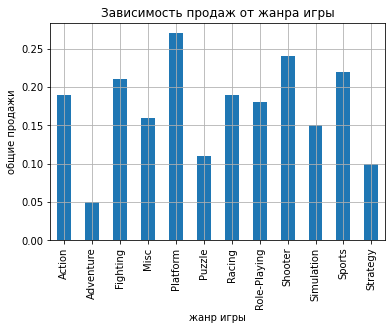

In [34]:
# построение столбчатой диаграммы зависимости
data.groupby('genre')['total_sales'].median().plot(kind='bar', grid=True)
plt.title('Зависимость продаж от жанра игры')
plt.xlabel("жанр игры")
plt.ylabel("общие продажи")
plt.show() 

<div class="alert alert-info">

**📝 Комментарий Маши**
   
Однозначно существует градация по прибыльным жанрам игр. По общей сумме продаж наиболее прибыльными считаются жанры - экшн, спортивные игры и шутеры. Лидер - экшн-игры. Но, обратившись к медианному значению продаж, видим, что большим успехом пользуются жанры Platform, Shooter, Sports. Action же лишь на 5 месте.

</div>

## Составить портрет пользователя каждого региона

### Определить для пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5)

/tmp/ipykernel_64/3817308860.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_platform = actual_data.groupby('platform')['na_sales', 'eu_sales', 'jp_sales'].sum()


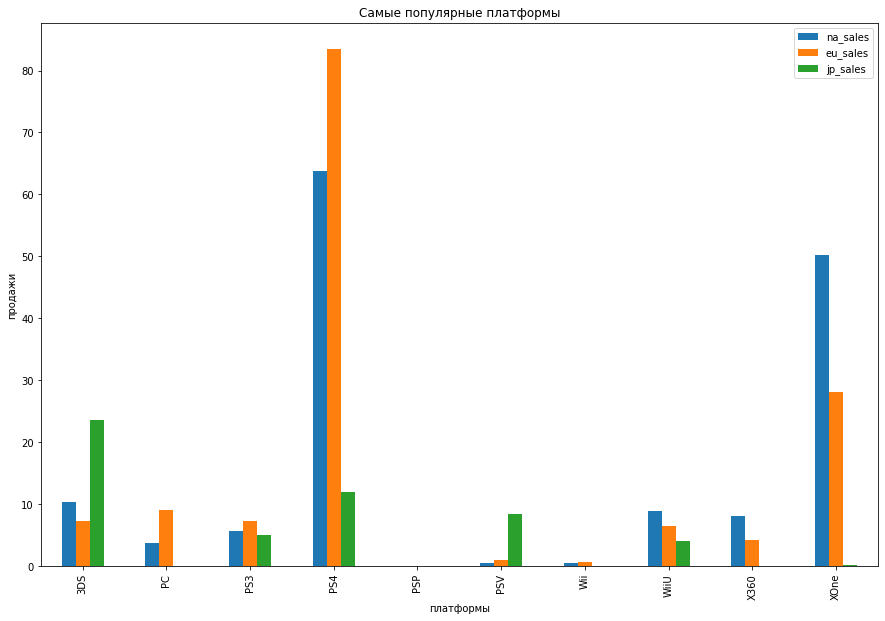

In [35]:
# создание таблицы с группировкой продаж по регионам по платформам
data_platform = actual_data.groupby('platform')['na_sales', 'eu_sales', 'jp_sales'].sum()

# построение столбчатой диаграммы зависимости
data_platform.plot.bar(figsize=(15, 10))
plt.title('Самые популярные платформы')
plt.xlabel("платформы")
plt.ylabel("продажи")
plt.show() 

<div class="alert alert-info">

**📝 Комментарий Маши**
   
Топ-5 популярных платформ в Северной Америке (в порядке убывания): PS4, XOne, 3DS, WiiU, X360; в Европе - PS4, XOne, PC, 3DS, PS3; В Японии - 3DS, PS4, PSV, PS3, WiiU.
    

</div>

- Самые популярные жанры (топ-5).

/tmp/ipykernel_64/3968312133.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_genre = actual_data.groupby('genre')['na_sales', 'eu_sales', 'jp_sales'].sum()


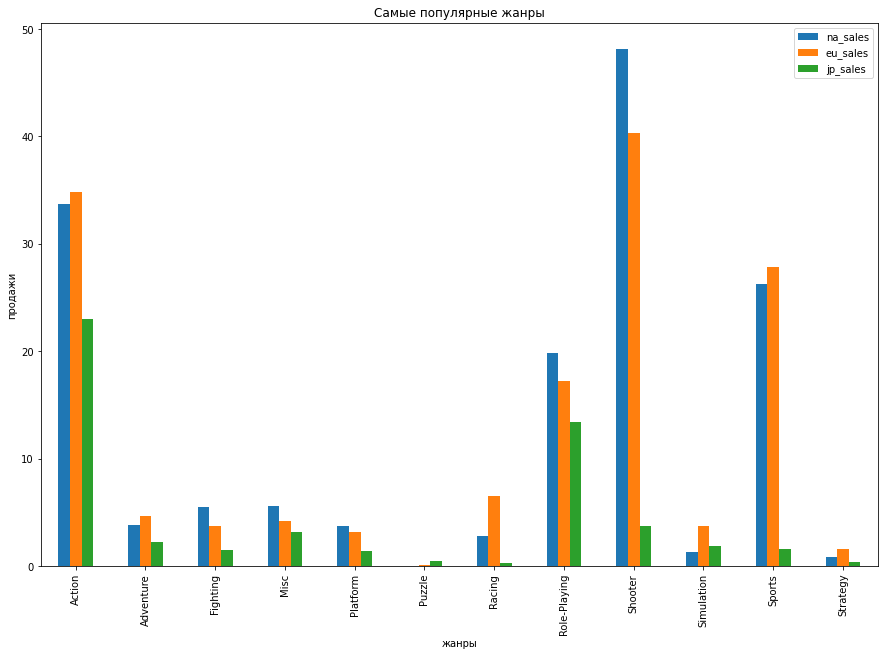

In [36]:
# создание таблицы с группировкой продаж по регионам по жанрам
data_genre = actual_data.groupby('genre')['na_sales', 'eu_sales', 'jp_sales'].sum()

# построение столбчатой диаграммы зависимости
data_genre.plot.bar(figsize=(15, 10))
plt.title('Самые популярные жанры')
plt.xlabel("жанры")
plt.ylabel("продажи")
plt.show() 

<div class="alert alert-info">

**📝 Комментарий Маши**
   
Топ-5 популярных жанров в Северной Америке и Европе одинаковые (в порядке убывания): Shooter, Action, Sports, Role-Playing, Racing; В Японии - Action, Role-Playing, Shooter, Misc, Adventure.
    
Разница, вероятно, заключается в разности менталитетов пользователей.
    

</div>

- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

/tmp/ipykernel_64/3751901130.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  esrb_to_sales = actual_data.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum()


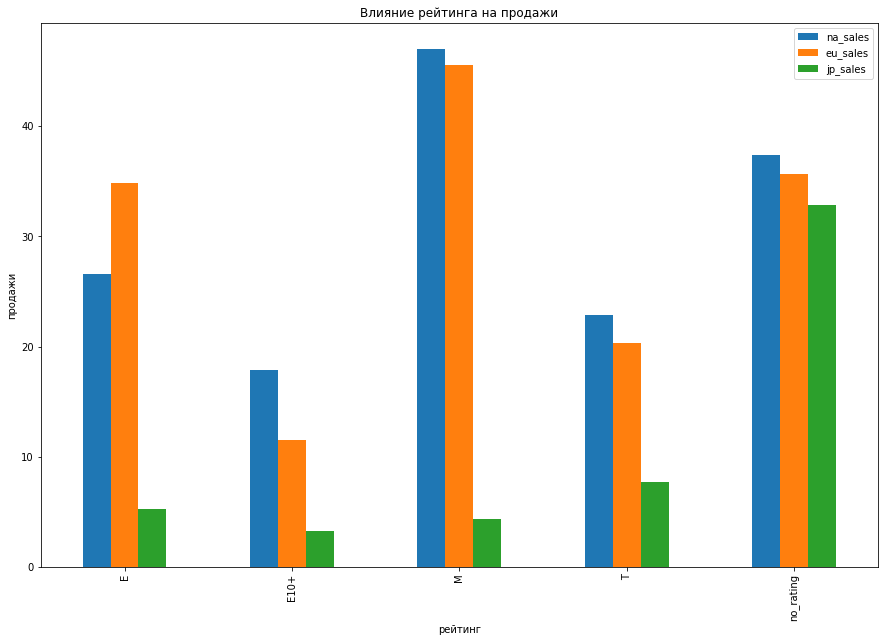

In [37]:
# создание таблицы с группировкой продаж по регионам по рейтингу
esrb_to_sales = actual_data.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum()

# построение столбчатой диаграммы зависимости
esrb_to_sales.plot.bar(figsize=(15, 10))
plt.title('Влияние рейтинга на продажи')
plt.xlabel("рейтинг")
plt.ylabel("продажи")
plt.show() 

<div class="alert alert-info">
    
**📝 Комментарий Маши**
   
Влияние рейтинга ESRB таково: большим успехом пользуются игры, направленные на взрослую аудиторию в Северной Америке и Европе, В Японии же наиболее популярны игры для подростков.
    

</div>

## Проверка гипотез 

**Нулевая гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    
**Альтернативная гипотеза:** Отвергаем нулевую гипотезу - средние пользовательские рейтинги платформ Xbox One и PC имеют различия.

In [38]:
# формируем данные для платформы
xbox_one = actual_data.loc[(actual_data['platform'] == 'XOne') &  (actual_data['user_score'] > 0)]['user_score'] 

# формируем данные для платформы
pc = actual_data.loc[(data['platform'] == 'PC') &  (actual_data['user_score'] > 0)]['user_score'] 

# вывод средних рейтингов для платформ
print('Средний пользовательский рейтинг платформы Xbox One:', xbox_one.mean())
print('Средний пользовательский рейтинг платформы PC', pc.mean())

# значение уровня значимости
alpha = .05

# вызов метода для проверки гипотезы  
results = st.ttest_ind(xbox_one, pc) 

# вывод значения p-value на экран
print('p-значение:', results.pvalue) 

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний пользовательский рейтинг платформы Xbox One: 6.542148760330578
Средний пользовательский рейтинг платформы PC 6.29642857142857
p-значение: 0.2778542084733835
Не получилось отвергнуть нулевую гипотезу


**Нулевая гипотеза:** Средние пользовательские рейтинги жанров Action и Sports одинаковые;
    
**Альтернативная гипотеза:** Отвергаем нулевую гипотезу - средние пользовательские рейтинги жанров Action и Sports имеют различия.

In [39]:
# формируем данные для жанра
action_genre = actual_data.loc[(actual_data['genre'] == 'Action') & (actual_data['user_score'] > 0)]['user_score']

# формируем данные для жанра
sports_genre = actual_data.loc[(actual_data['genre'] == 'Sports') & (actual_data['user_score'] > 0)]['user_score']

# вывод средних рейтингов для жанров
print('Средний пользовательский рейтинг жанра action:', action_genre.mean())
print('Средний пользовательский рейтинг жанра sports', sports_genre.mean())

# значение уровня значимости
alpha = .05 

# вызов метода для проверки гипотезы
results = st.ttest_ind(action_genre, sports_genre, equal_var = False) 

# вывод значения p-value на экран
print('p-значение:', results.pvalue) 

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний пользовательский рейтинг жанра action: 6.808290155440415
Средний пользовательский рейтинг жанра sports 5.198780487804878
p-значение: 5.97163549920592e-10
Отвергаем нулевую гипотезу


<div class="alert alert-info">
    
**📝 Комментарий Маши**
   
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Средние пользовательские рейтинги жанров Action и Sports имеют различия.     

</div>

## Выводы

- пиковые время выпуска игр - конец 2000-х-начало 2010-х. С 2012 г. индустрия испытывает резкий спад в производстве игр;
- средний срок жизни платформ - 10 лет, пик популярности - 5 лет;
- наиболее подходящие период для прогнозныех данных по 2017 г. - это данные за последние два года 2015-2016 гг.;
- актуальные лидирующие по продажам платформы - PS4, Xone, 3DS, WiiU, PS3;
- продажи игр имеют слабую зависимость или не зависят вовсе от отзывов пользователей и критиков;
- по общей сумме продаж наиболее прибыльными считаются жанры - Action, Sports и Shooter; по медианной - Platform, Shooter, Sports;
- топ-5 популярных платформ в Северной Америке (в порядке убывания): PS4, XOne, 3DS, WiiU, X360; в Европе - PS4, XOne, PC, 3DS, PS3; В Японии - 3DS, PS4, PSV, PS3, WiiU;
- топ-5 популярных жанров в Северной Америке и Европе одинаковый (в порядке убывания): Shooter, Action, Sports, Role-Playing, Racing; В Японии - Action, Role-Playing, Shooter, Misc, Adventure;
- в Северной Америке и Европе большим успехом пользуются игры, направленные на взрослую аудиторию , В Японии же наиболее популярны игры для подростков;
- при проверке гипотез выявили: средние пользовательские рейтинги платформ Xbox One и PC одинаковые; средние пользовательские рейтинги жанров Action и Sports разные (для проверки правдоподобия статистических гипотез использовался критерий значимости (5% уровень значимости) и метод t-test).